In [2]:
import trimesh
import xatlas

obj_path = 'data/meshes/cat_statue.obj'

In [5]:
uids = {
    "owl": "f98c5ee54c4a48f8b5eafd35a81dde4d",
    "helmet": "a8813ea1e0ce47ab97a416637a7520d7",
    "backpack": "9fa2da2c42234b58896e8d23393cac24",
    "penguin": "b19ef2650b4347348710eb6364ca90bd",
    "armor": "8a60954eccad433e987bbcafc7657140",
}

In [6]:
import objaverse

objects = objaverse.load_objects(uids.values())
metadata = objaverse.load_annotations(uids.values())

In [1]:
uid = uids['owl']
name = metadata[uid]['name']
path = objects[uid]
mesh = trimesh.load_mesh(path)

NameError: name 'uids' is not defined

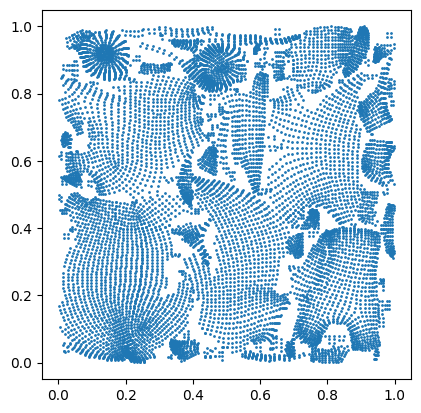

In [8]:
from matplotlib import pyplot as plt

mesh = trimesh.load_mesh(path)

vmapping, indices, uvs = xatlas.parametrize(mesh.vertices, mesh.faces)
xatlas.export("data/out.obj", mesh.vertices[vmapping], indices, uvs)

plt.scatter(uvs[:, 0], uvs[:, 1], s=1)
plt.gca().set_aspect('equal', adjustable='box')

In [9]:
import torch
from text3d2video.rendering import render_rgb_uv_map
from text3d2video.util import read_obj_with_uvs
from text3d2video.utilities.camera_placement import turntable_extrinsics
from pytorch3d.renderer import FoVPerspectiveCameras

from text3d2video.utilities.video_comparison import display_vid
from text3d2video.utilities.video_util import pil_frames_to_clip

mesh, verts_uvs, faces_uvs = read_obj_with_uvs("data/out.obj")

R, T = turntable_extrinsics(angles=torch.linspace(0, 360, 20))
cams = FoVPerspectiveCameras(R=R, T=T, fov=30).cuda()
meshes = mesh.extend(len(cams))

display_vid(pil_frames_to_clip(render_rgb_uv_map(meshes, cams, verts_uvs, faces_uvs)))